In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
%matplotlib inline
df = pd.read_csv("C:/Semester 3/Data Mining/New folder/NIJ2015_JAN01_DEC31.csv")
print(df)

             CATEGORY     CALL GROUPS final_case_type  \
0       STREET CRIMES        DISORDER          DISTP    
1       STREET CRIMES        DISORDER          DISTP    
2       STREET CRIMES        DISORDER          DISTP    
3       STREET CRIMES        DISORDER          DISTP    
4       STREET CRIMES        DISORDER          DISTP    
...               ...             ...             ...   
208078       BURGLARY  PROPERTY CRIME          BURGP    
208079       BURGLARY  PROPERTY CRIME          BURGP    
208080       BURGLARY  PROPERTY CRIME          BURGP    
208081       BURGLARY  PROPERTY CRIME          BURGP    
208082       BURGLARY  PROPERTY CRIME          BURGP    

                                                CASE DESC    occ_date  \
0       DISTURBANCE - PRIORITY                        ...    1/1/2015   
1       DISTURBANCE - PRIORITY                        ...    1/1/2015   
2       DISTURBANCE - PRIORITY                        ...    1/1/2015   
3       DISTURBANCE - P

In [2]:
df.isnull().sum()

CATEGORY              0
CALL GROUPS           0
final_case_type       0
CASE DESC             0
occ_date              0
x_coordinate          0
y_coordinate          0
census_tract       9830
dtype: int64

In [3]:
mean_value = df['census_tract'].mean()
print('Mean of values in column census_tract:')
print(mean_value)

Mean of values in column census_tract:
6270.097310002875


In [4]:
df['census_tract'].fillna(value=df['census_tract'].mean(), inplace=True)
df.isnull().sum()

CATEGORY           0
CALL GROUPS        0
final_case_type    0
CASE DESC          0
occ_date           0
x_coordinate       0
y_coordinate       0
census_tract       0
dtype: int64

In [5]:

toconsider = ['CATEGORY','x_coordinate','y_coordinate']
info=df[toconsider]
print(info)

             CATEGORY  x_coordinate  y_coordinate
0       STREET CRIMES       7624403        663901
1       STREET CRIMES       7626061        707425
2       STREET CRIMES       7626432        655739
3       STREET CRIMES       7638375        689076
4       STREET CRIMES       7640361        706981
...               ...           ...           ...
208078       BURGLARY       7674417        685601
208079       BURGLARY       7688761        683719
208080       BURGLARY       7689764        675992
208081       BURGLARY       7671619        666586
208082       BURGLARY       7680989        679340

[208083 rows x 3 columns]


In [6]:
N = info[['x_coordinate','y_coordinate']]
N = StandardScaler().fit_transform(N)
N

array([[-1.95606012, -1.66892947],
       [-1.85834276,  1.86362385],
       [-1.83647718, -2.33138468],
       ...,
       [ 1.89611373, -0.6875835 ],
       [ 0.82670392, -1.4510059 ],
       [ 1.37894255, -0.41584863]])

In [7]:
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(N)
    sum_of_squared_distances.append(k_means.inertia_)


C:\Users\shahd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shahd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shahd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shahd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

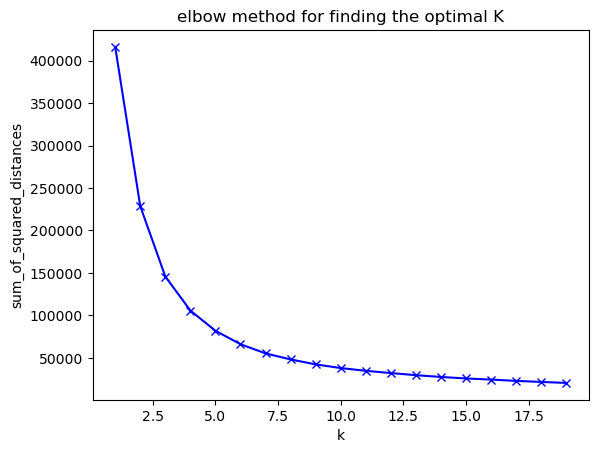

In [8]:
plt.plot(K,sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for finding the optimal K')
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df[toconsider[1:]]  
y = df[toconsider[0]]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 81.38%


In [ ]:
k_means_7 = KMeans(n_clusters=7)
model = k_means_7.fit(N)
y_hat_7 = k_means_7.predict(N)
labels_7 = k_means_7.labels_
print(metrics.silhouette_score(N,labels_7,metric ='euclidean'))
#print(metrics.calinski_harabasz_score(x,labels_7))

In [ ]:
plt.scatter(N[:,0],N[:,1],c=labels_7,s=50,cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=1)

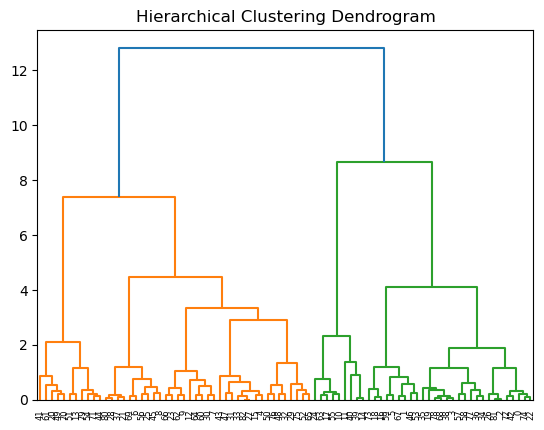

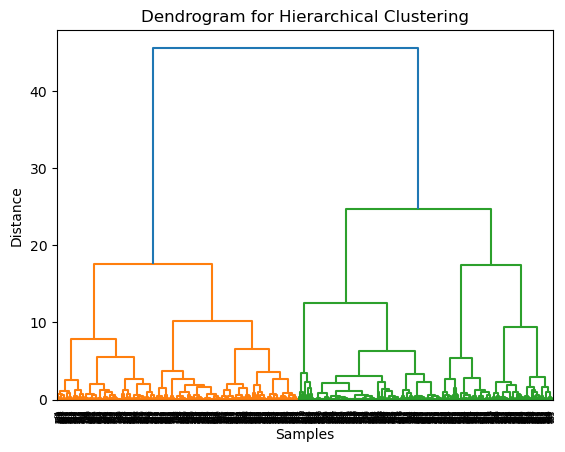

In [10]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

batch_size = 1000  # Set an appropriate batch size
num_samples = N.shape[0]

for i in range(0, num_samples, batch_size):
    batch_data = N[i:i+batch_size, :]
    
    model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
    model.fit(batch_data)


# Plot dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()


# Perform hierarchical clustering using a subset of data to speed up execution

linkage_matrix = linkage(N[:batch_size], method='ward')

# Plot the dendrogram
dendrogram(linkage_matrix, labels=target.tolist() if 'target' in df.columns else None, leaf_rotation=90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Assuming you have your data in the variable 'N'
pca = PCA(n_components=2)  # Choose the number of components you want
N_reduced = pca.fit_transform(N)

# Adjust the batch_size based on your available memory
batch_size = 1000

# Create MiniBatchKMeans model
model = MiniBatchKMeans(n_clusters=3, batch_size=batch_size)
labels = model.fit_predict(N_reduced)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(N_reduced, labels)
print(f"Silhouette Score: {silhouette_avg}")


0    104636
1     81501
2     21946
Name: Cluster, dtype: int64


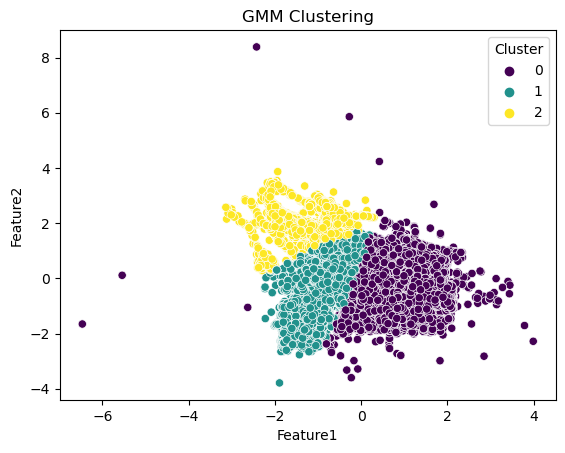

In [12]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset has features that you want to use for clustering
X = N[:, :]  # Direct array indexing instead of iloc

# Choose the number of clusters (you can adjust this based on your data)
num_clusters = 3

# Fit a Gaussian Mixture Model to the data
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(X)

# Predict the cluster labels
cluster_labels = gmm.predict(X)

# Create a DataFrame for visualization (optional, but useful for seaborn plotting)
data = pd.DataFrame(data=X, columns=['Feature1', 'Feature2'])  # Replace with actual column names

# Add the cluster labels to the DataFrame
data['Cluster'] = cluster_labels

# Print the cluster distribution
print(data['Cluster'].value_counts())

# Visualize the clusters (assuming you have 2D data, you may need to modify for more dimensions)
sns.scatterplot(x=data['Feature1'], y=data['Feature2'], hue=data['Cluster'], palette='viridis')
plt.title('GMM Clustering')
plt.show()
